In [1]:
# Loading the Important Libaries 

import os
import pandas as pd
import numpy as np

# For Visualization

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# To Ignore Warnings 

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Data 

train_data = pd.read_csv("train_data.csv")

test_data = pd.read_csv("test_data.csv")

assembly_line_info = pd.read_csv("assembly_line_info.csv")

issue_info = pd.read_csv("issue_info.csv")

log_report_type_data = pd.read_csv("log_report_type_data.csv")

car_variant_data = pd.read_csv("car_variant_data.csv")

In [3]:
train_data.head()

,id,factory_number,downtime_duration
0,13366,factory_number_415,1
1,6783,factory_number_474,0
2,9519,factory_number_931,1
3,10202,factory_number_700,1
4,4555,factory_number_600,2


In [4]:
test_data.head()

,id,factory_number
0,3340,factory_number_344
1,14067,factory_number_933
2,1134,factory_number_16
3,27,factory_number_793
4,9793,factory_number_344


In [5]:
assembly_line_info.head()

,id,assembly_line_type
0,6597,assembly_line_type_8
1,8011,assembly_line_type_8
2,2597,assembly_line_type_8
3,5022,assembly_line_type_8
4,6852,assembly_line_type_8


In [6]:
issue_info.head()

,id,issue_type
0,6597,issue_type_2
1,8011,issue_type_2
2,2597,issue_type_2
3,5022,issue_type_1
4,6852,issue_type_1


In [7]:
log_report_type_data.head()

,id,log_report_type,volume
0,6597,log_report_type_68,6
1,8011,log_report_type_68,7
2,2597,log_report_type_68,1
3,5022,log_report_type_172,2
4,5022,log_report_type_56,1


In [8]:
car_variant_data.head()

,id,car_variant
0,6597,car_variant_11
1,8011,car_variant_15
2,2597,car_variant_15
3,5022,car_variant_15
4,5022,car_variant_11


In [9]:
# Checking the dimentions of the data 
print("train_data dimention:\n")
print(train_data.shape)
print("\n")

print("test_data dimention:\n")
print(test_data.shape)
print("\n")

print("assembly_line_info dimention:\n")
print(assembly_line_info.shape)
print("\n")

print("issue info dimention:\n")
print(issue_info.shape)
print("\n")

print("log_report_type_data dimention:\n")
print(log_report_type_data.shape)
print("\n")

print("car variant data dimention:")
print(car_variant_data.shape)
print("\n")

train_data dimention:

(5904, 3)


test_data dimention:

(1477, 2)


assembly_line_info dimention:

(21076, 2)


issue info dimention:

(18552, 2)


log_report_type_data dimention:

(58671, 3)


car variant data dimention:
(31170, 2)




In [10]:
# Checking the unique levels in each data 
print("train_data levels:\n")
print(train_data.nunique())
print("\n")

print("test_data levels:\n")
print(test_data.nunique())
print("\n")

print("assembly_line_info levels:\n")
print(assembly_line_info.nunique())
print("\n")

print("issue info levels:\n")
print(issue_info.nunique())
print("\n")

print("log_report_type_data levels:\n")
print(log_report_type_data.nunique())
print("\n")

print("car variant data levels:")
print(car_variant_data.nunique())
print("\n")

train_data levels:

id                   5904
factory_number        876
downtime_duration       3
dtype: int64


test_data levels:

id                1477
factory_number     531
dtype: int64


assembly_line_info levels:

id                    18552
assembly_line_type       10
dtype: int64


issue info levels:

id            18552
issue_type        5
dtype: int64


log_report_type_data levels:

id                 18552
log_report_type      386
volume               341
dtype: int64


car variant data levels:
id             18552
car_variant       53
dtype: int64




#### Analysing Unique Levels in each dataset.

* There are **876** unique factories in `train_data`. 
* There are **531** unique factories in `test_data`. 
* There are **10** different types of `assembly lines`. 
* **5** unique issue types are there in the `issues` data. 
* There are **386** different log_report_types and 341 volumes in `log report data`.
* Currently there are **53** types of car variant in the `car variant data`. 

## Combining Data For visualizations.

In [11]:
train_data= train_data.drop_duplicates(subset=['id'])
assembly_line_info= assembly_line_info.drop_duplicates(subset=['id'])

# Merging train data and assembly data
df1 = pd.merge(train_data,assembly_line_info, how = 'left',on = 'id') 
issue_info= issue_info.drop_duplicates(subset=['id'])

# Merging issue info
df2 = pd.merge(df1,issue_info, how='left', on = 'id')
log_report_type_data= log_report_type_data.drop_duplicates(subset=['id'])

# Merging log report type
df3 = pd.merge(df2,log_report_type_data, how='left',on = 'id')
car_variant_data= car_variant_data.drop_duplicates(subset=['id'])

# Merging car variant 
data = pd.merge(df3, car_variant_data, how='left',on = 'id')

In [12]:
data

,id,factory_number,downtime_duration,assembly_line_type,issue_type,log_report_type,volume,car_variant
0,13366,factory_number_415,1,assembly_line_type_2,issue_type_4,log_report_type_312,1,car_variant_35
1,6783,factory_number_474,0,assembly_line_type_2,issue_type_2,log_report_type_312,2,car_variant_35
2,9519,factory_number_931,1,assembly_line_type_8,issue_type_2,log_report_type_203,3,car_variant_15
3,10202,factory_number_700,1,assembly_line_type_8,issue_type_1,log_report_type_54,1,car_variant_11
4,4555,factory_number_600,2,assembly_line_type_8,issue_type_2,log_report_type_82,30,car_variant_15
...,...,...,...,...,...,...,...,...
5899,1910,factory_number_403,1,assembly_line_type_2,issue_type_2,log_report_type_232,1,car_variant_34
5900,10475,factory_number_821,0,assembly_line_type_8,issue_type_1,log_report_type_74,4,car_variant_15
5901,10675,factory_number_798,2,assembly_line_type_8,issue_type_2,log_report_type_203,3,car_variant_15
5902,14714,factory_number_210,0,assembly_line_type_2,issue_type_2,log_report_type_232,2,car_variant_35


### Target Variable Destribution

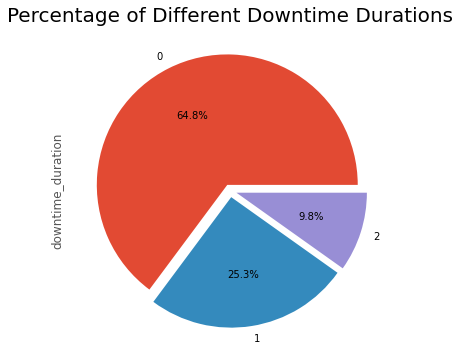

In [13]:
Y = data.downtime_duration.value_counts()
plt.figure(figsize=(20,6))
plt.style.use('ggplot')
Y.plot.pie(autopct="%.1f%%",explode=[0.05]*3)
plt.title('Percentage of Different Downtime Durations', fontsize=20)
plt.show()

* According to the data, **64.8%** have low downtime (15 minutes to 1 hour), followed by **25.3%** downtime which lasts anywhere between 1 hour and 24 hours and **9.8%** for long downtimes that can last from 24 hours to sometimes even several days.

### Top 10 factories most prone to downtime. 

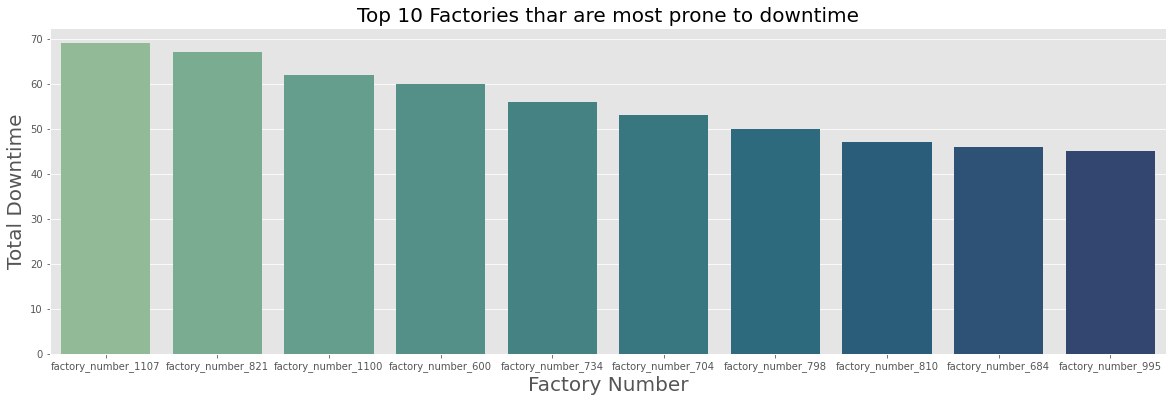

In [14]:
X = pd.DataFrame(data.groupby(['factory_number'])['downtime_duration'].sum())
X = X.sort_values('downtime_duration', ascending=False)
X = X[0:10].reset_index()
X.sort_values('downtime_duration',inplace = True, ascending = False)
plt.figure(figsize=(20,6))
plt.style.use('ggplot')
sns.barplot('factory_number','downtime_duration',data = X,palette='crest')
plt.ylabel('Total Downtime', fontsize=20)
plt.xlabel('Factory Number', fontsize=20)
plt.title('Top 10 Factories thar are most prone to downtime', fontsize=20)
plt.show()

#### Top factories that are most prone to downtime are - 

 * Factory Number - **1107**
 * Factory Number - **821**
 * Factory Number - **1100**
 * Factory Number - **600**
 * Factory Number - **734**

#### Assembly line type that are suspected of long downtime duration.

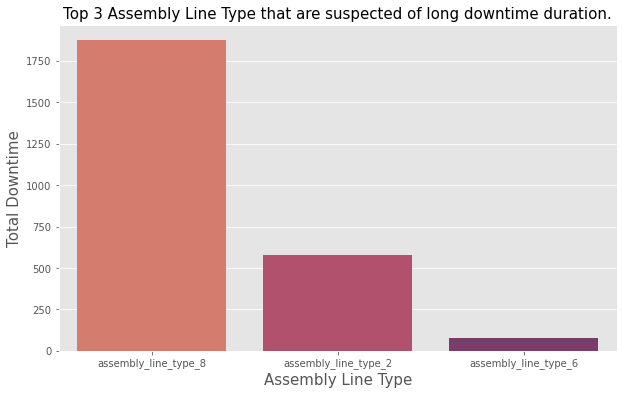

In [15]:
X = pd.DataFrame(data.groupby(['assembly_line_type'])['downtime_duration'].sum())
X = X.sort_values('downtime_duration', ascending=False)
X = X[0:3].reset_index()
X.sort_values('downtime_duration',inplace = True,ascending = False)
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.barplot('assembly_line_type','downtime_duration',data = X,palette='flare')
plt.ylabel('Total Downtime', fontsize=15)
plt.xlabel('Assembly Line Type', fontsize=15)
plt.title('Top 3 Assembly Line Type that are suspected of long downtime duration.', fontsize=15)
plt.show()

* Assembly Line Type `8` &  Assembly Line Type `2` are responsible for majority of the downtime. 

#### Car Varients that are effecting the downtime duration. 

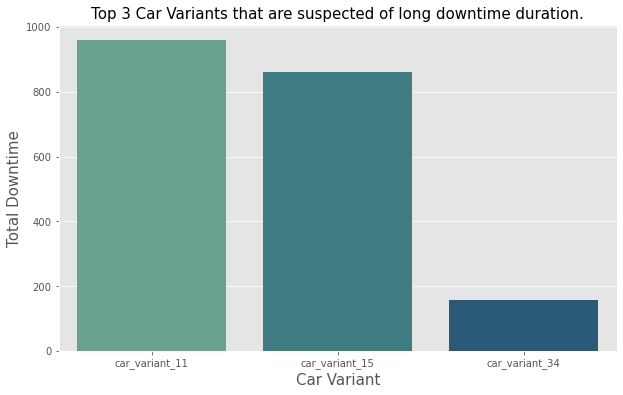

In [16]:
X = pd.DataFrame(data.groupby(['car_variant'])['downtime_duration'].sum())
X = X.sort_values('downtime_duration', ascending=False)
X = X[0:3].reset_index()
X.sort_values('downtime_duration',inplace = True,ascending = False)
plt.figure(figsize=(10,6))
plt.style.use('ggplot')
sns.barplot('car_variant','downtime_duration',data = X,palette='crest')
plt.ylabel('Total Downtime', fontsize=15)
plt.xlabel('Car Variant', fontsize=15)
plt.title('Top 3 Car Variants that are suspected of long downtime duration.', fontsize=15)
plt.show()

* Car Variant `11` and Car variant `15` are also responsible for majority of the downtime. 

_END_